# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1]:
#основные
import pandas as pd
import numpy as np
import datetime

#визуализация
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

#подготовка и обработка данных
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

#для моделирования
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score #  метрика силуэта


import warnings 
from IPython.display import display, HTML
warnings.filterwarnings("ignore")
plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [2]:
data = pd.read_csv(
    "data.csv", 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [3]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


In [4]:
data.describe(include = 'all').round(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909,541909,540455,541909.00,541909,541909.00,406829,541909
unique,25900,4070,4223,NaN,NaN,NaN,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,17841,United Kingdom
freq,1114,2313,2369,NaN,NaN,NaN,7983,495478
mean,NaN,NaN,NaN,9.55,2011-07-04 13:34:57.156386048,4.61,NaN,NaN
min,NaN,NaN,NaN,-80995.00,2010-12-01 08:26:00,-11062.06,NaN,NaN
25%,NaN,NaN,NaN,1.00,2011-03-28 11:34:00,1.25,NaN,NaN
50%,NaN,NaN,NaN,3.00,2011-07-19 17:17:00,2.08,NaN,NaN
75%,NaN,NaN,NaN,10.00,2011-10-19 11:27:00,4.13,NaN,NaN
max,NaN,NaN,NaN,80995.00,2011-12-09 12:50:00,38970.00,NaN,NaN


В рамках каждого наблюдения среднее количество товаров в счете-фактуре - 10, однако максимальное кол-во купленных товаров в одном счете - 80995 позиции - что может являться либо выбросом, либо говорить о наличие оптовых покупателей в рамках данных
Средняя цена товара - 4.13 фунтов, максимальная цена - 38970. также есть отрицательные цены

In [5]:
data[data['Quantity'] == 80995.00 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom


In [6]:
data[data['UnitPrice'] == -11062.06]
#в данном случае речь также идет о какой-то специальной операции - в описании указано - "Adjust bad debt"

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [7]:
data[data['UnitPrice'] == 38970.00 ]
#в данном случае была произведена отмена операции (счет начинается на С)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.0,15098,United Kingdom


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
print( 'Количество уникальных покупателей:', data['CustomerID'].nunique())
print('__________________________')
print( 'Страны, где совершались транзакции:', data['Country'].value_counts())

Количество уникальных покупателей: 4372
__________________________
Страны, где совершались транзакции: Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                

## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [10]:
#пропуски
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
#удаляем строки в случае наличия пропуска в столбце CustomerID
data = data.dropna(subset='CustomerID')
print('Data shape после удаления пропусков: {}'.format(data.shape))

Data shape после удаления пропусков: (406829, 8)


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [12]:
print('Количество дубликатов:', data[data.duplicated()].shape)
data = data.drop_duplicates()
print('Data shape после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: (5225, 8)


Data shape после удаления дубликатов: (401604, 8)


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [13]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [14]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [15]:
#количество транзакций в данных не имеют контрагентов
data['QuantityCanceled'].isnull().sum()

1303

In [16]:
data = data.dropna(subset='QuantityCanceled')
print('Data shape после удаления пропусков: {}'.format(data.shape))

Data shape после удаления пропусков: (400301, 9)


In [17]:
#Исключим транзакции с отрицательным количеством товара
data = data[data['Quantity']>=0]

#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [18]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0


In [19]:
#С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

path = r'^[a-zA-Z]+'
data['special_operations'] = data['StockCode'].str.contains(path)
data = data[data['special_operations']==False]

#удалим все специальные транзакции из таблицы.
data = data.drop('special_operations',axis=1)
print('Data shape после удаления специальных транзакций: {}'.format(data.shape))

Data shape после удаления специальных транзакций: (391183, 9)


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [20]:
data[data['UnitPrice']==0].count()

InvoiceNo           33
StockCode           33
Description         33
Quantity            33
InvoiceDate         33
UnitPrice           33
CustomerID          33
Country             33
QuantityCanceled    33
dtype: int64

In [21]:
#Удалим данные с нулевой ценой товара
data = data[data['UnitPrice']>0]
print('Data shape: {}'.format(data.shape))

Data shape: (391150, 9)


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [22]:
data['TotalPrice'] = data['UnitPrice']*(data['Quantity']-data['QuantityCanceled'])

Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


In [23]:
#сделаем копию данных
data_cl = data.copy()

### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



In [24]:
data_cl.describe(include = 'all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
count,391150,391150,391150,391150.000000,391150,391150.000000,391150,391150,391150.000000,391150.000000
unique,18402,3659,3871,NaN,NaN,NaN,4334,37,NaN,NaN
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,17841,United Kingdom,NaN,NaN
freq,541,2023,2016,NaN,NaN,NaN,7667,348872,NaN,NaN
mean,NaN,NaN,NaN,13.145300,2011-07-10 19:37:34.766713600,2.874372,NaN,NaN,0.626622,21.126404
min,NaN,NaN,NaN,1.000000,2010-12-01 08:26:00,0.040000,NaN,NaN,0.000000,-81.000000
25%,NaN,NaN,NaN,2.000000,2011-04-07 11:16:00,1.250000,NaN,NaN,0.000000,4.680000
50%,NaN,NaN,NaN,6.000000,2011-07-31 12:05:00,1.950000,NaN,NaN,0.000000,11.700000
75%,NaN,NaN,NaN,12.000000,2011-10-20 12:57:00,3.750000,NaN,NaN,0.000000,19.500000
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,649.500000,NaN,NaN,80995.000000,7144.720000


In [25]:
#посмотрим предварительно структуру данных
table = pd.pivot_table(data_cl, index = "Country", values = ["TotalPrice", 'CustomerID','InvoiceNo'], aggfunc = {'TotalPrice': "sum", 'CustomerID': "nunique",'InvoiceNo': "nunique"},sort=False).sort_values(by='TotalPrice', ascending=False)
table.head(10)

,TotalPrice,CustomerID,InvoiceNo
Country,,,
United Kingdom,6797691.44,3916,16579
Netherlands,283443.54,9,93
EIRE,247074.57,3,256
Germany,201520.71,94,443
France,181529.63,87,379
Australia,136950.25,9,56
Switzerland,51863.75,21,47
Spain,51764.90,30,88
Belgium,36673.04,25,98


Таким образом, в данных основная информация содержится о заказах/покупателях из Великобритании (United Kingdom)

In [26]:
#рассмотрим каждый из разрезов поподробнее
#уникальные клиенты в разрезе стран
cust_by_county = data_cl.groupby("Country")["CustomerID"].nunique().sort_values(ascending= False)

df_cust_by_country = pd.DataFrame((cust_by_county.nlargest(5))).reset_index()
df_cust_by_country.loc[len(df_cust_by_country.index)] = ['Others', (cust_by_county.sum()-(cust_by_county.nlargest(5).sum()))]  
df_cust_by_country
#создадим круговую диаграмму
fig = px.pie(
    df_cust_by_country, 
    values='CustomerID', 
    names="Country",
    title='Количество уникальных клиентов в разрезе стран')
fig.show()

In [27]:
#уникальное кол-во заказов в разрезе стран
invoice_by_county = data_cl.groupby("Country")["InvoiceNo"].nunique().sort_values(ascending= False)

df_invoice_by_county = pd.DataFrame((invoice_by_county.nlargest(5))).reset_index()
df_invoice_by_county.loc[len(df_invoice_by_county.index)] = ['Others', (invoice_by_county.sum()-(invoice_by_county.nlargest(5).sum()))]  
df_invoice_by_county

#создадим круговую диаграмму
fig = px.pie(
    df_invoice_by_county, 
    values='InvoiceNo', 
    names="Country",
    title='Количество уникальных заказов в разрезе стран')
fig.show()

In [28]:
#выручка в разрезе стран стран

money_by_country = data_cl.groupby("Country")["TotalPrice"].sum().sort_values(ascending= False)

df_money_by_country = pd.DataFrame((money_by_country.nlargest(5))).reset_index()
df_money_by_country.loc[len(df_money_by_country.index)] = ['Others', (money_by_country.sum()-(money_by_country.nlargest(5).sum()))]  
df_money_by_country

#создадим круговую диаграмму
fig = px.pie(
    df_money_by_country, 
    values='TotalPrice', 
    names="Country",
    title='Выручка в разрезе стран')
fig.show()


Не удивительно, что основные клиенты (и заказы, соотвественно) базирующейся в Великобритании компании, находятся там же (90%),  82% выручки приходится на Великобританию, следующая страна - Нидерланды - приносит лишь 3.43%. 

In [29]:
#для ответа на следующие вопросы необходимо добавить несколько столбцов:

data_cl['DateofInvoice'] = data_cl['InvoiceDate'].dt.date
data_cl['HourofInvoice'] = data_cl['InvoiceDate'].dt.hour

In [30]:
data_cl

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,DateofInvoice,HourofInvoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30,2010-12-01,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,2010-12-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00,2010-12-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,2010-12-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34,2010-12-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,0.0,10.20,2011-12-09,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,0.0,12.60,2011-12-09,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60,2011-12-09,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,0.0,16.60,2011-12-09,12


In [31]:
invoice_by_date = data_cl.groupby("DateofInvoice")["InvoiceNo"].nunique()

fig = px.line(invoice_by_date,
            title = 'Частота заказов',
            labels={'DateofInvoice': 'День поступления заказа', 'value':'Количество заказов'}
         )
fig.show()

На графике можно отметить увеличение заказа в 4кв года - что объясняется наступлением времени подготовки к празникам Хеллоуина и Рождества. Поэтому считаю возможным говорить о наличие сезонности в данных.

In [32]:
invoice_by_date_hour = data_cl.groupby( ['DateofInvoice','HourofInvoice'])["InvoiceNo"].nunique()
invoice_by_date_hour

DateofInvoice  HourofInvoice
2010-12-01     8                 6
               9                16
               10               11
               11               12
               12               22
                                ..
2011-12-09     8                 4
               9                10
               10                8
               11                6
               12               13
Name: InvoiceNo, Length: 2853, dtype: int64

In [33]:
#среднее количество ежедневно поступающих заказов в каждый из часов.
invoice_by_date_hour.mean()

6.450403084472485

In [34]:
fig = px.bar(data_cl.groupby('HourofInvoice')["InvoiceNo"].nunique(),
            title='Зависимость количества заказов от часа дня' ,
            text_auto=True,
            labels={'HourofInvoice': 'Час поступления заказа', 'value':'Количество заказов'}
         )
fig.show()

In [35]:
mean_invoice_per_hour = round(invoice_by_date_hour.groupby("HourofInvoice").mean(),2)
mean_invoice_per_hour

HourofInvoice
6      1.00
7      1.26
8      2.72
9      5.49
10     7.27
11     7.44
12    10.22
13     8.69
14     7.48
15     6.71
16     4.12
17     2.95
18     3.60
19     2.92
20     1.29
Name: InvoiceNo, dtype: float64

In [36]:
fig = px.bar(mean_invoice_per_hour,
            title='Среднее количество ежедневно поступающих заказов по времени суток',
            text_auto=True,
            labels={'HourofInvoice': 'Час поступления заказа', 'value':'Среднее количество заказов'}
         )

fig.show()

Основное количество заказов поступает с 12 до 14 дня - те потребители активнее осуществяют заказы на подарки в обеденное время.

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<center> <img src=https://miro.medium.com/max/1400/1*uYQjy9SUjW7iWHc2gGanQQ.png align="right" width="400"/> </center>

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [37]:
#расчет для Recency

Date_t0 = pd.to_datetime('2011-12-10 00:00:00') 
delta_days = (Date_t0 - data_cl.groupby('CustomerID')['InvoiceDate'].max()).dt.days

#расчет Frequency (общее количество уникальных заказов, которые совершил i-ый клиент)

invoice_by_client = data_cl.groupby('CustomerID')['InvoiceNo'].nunique()

#расчет Monetary_Value 
money_by_client = data_cl.groupby('CustomerID')['TotalPrice'].sum()

In [38]:
#соберем обновленный датафрейм - RFM-таблицу
rfm_table = pd.DataFrame()
rfm_table['Recency'] = delta_days
rfm_table['Frequency'] = invoice_by_client
rfm_table['Monetary_Value'] = money_by_client
rfm_table.reset_index()

,CustomerID,Recency,Frequency,Monetary_Value
0,12346,325,1,0.00
1,12347,2,7,4310.00
2,12348,75,4,1437.24
3,12349,18,1,1457.55
4,12350,310,1,294.40
...,...,...,...,...
4329,18280,277,1,180.60
4330,18281,180,1,80.82
4331,18282,7,2,176.60
4332,18283,3,16,2039.58


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [39]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency","Frequency", "Monetary"
        
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
fig.show()

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [40]:
rfm_table.describe()

,Recency,Frequency,Monetary_Value
count,4334.000000,4334.000000,4334.000000
mean,92.226581,4.245962,1906.689661
std,100.175327,7.634989,8304.237509
min,0.000000,1.000000,0.000000
25%,17.000000,1.000000,298.257500
50%,50.000000,2.000000,651.395000
75%,142.000000,5.000000,1606.405000
max,373.000000,206.000000,278742.020000


In [41]:
#удалим выбросы - граница: квантиль уровня 0,95 

upper_bound_freq = rfm_table['Frequency'].quantile(0.95)
upper_bound_mon = rfm_table['Monetary_Value'].quantile(0.95)

outliers = rfm_table[(rfm_table['Frequency'] > upper_bound_freq) | (rfm_table['Monetary_Value'] > upper_bound_mon)]

rfm = rfm_table[(rfm_table['Frequency'] <= upper_bound_freq) & (rfm_table['Monetary_Value'] <= upper_bound_mon)]

print('Количество выбросов:', outliers.shape[0])
print('Количество наблюдений в результирующей таблице:', rfm.shape[0])

Количество выбросов: 290
Количество наблюдений в результирующей таблице: 4044


## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [42]:
#стандартизируем данные и понизим их размерность с использованием pipeline

pipeline = Pipeline([   ('scaler', preprocessing.StandardScaler()),
                        ('pca', PCA(n_components=2, random_state=42))
                            ])

st_principal_comp = pipeline.fit_transform(rfm)
st_principal_comp

array([[-2.13520066,  1.40159569],
       [ 3.44712453,  0.85287213],
       [ 0.62910337,  0.08321704],
       ...,
       [-1.42102558,  0.16834651],
       [-0.31933001, -1.19828491],
       [ 0.77186997, -0.15752725]])

In [43]:
#посмотрим на матрицу корреляций компонент 
corr_matrix = pd.DataFrame(st_principal_comp).corr(method='pearson')
round(corr_matrix,4)
#компоненты независимы

,0,1
0,1.0,-0.0
1,-0.0,1.0


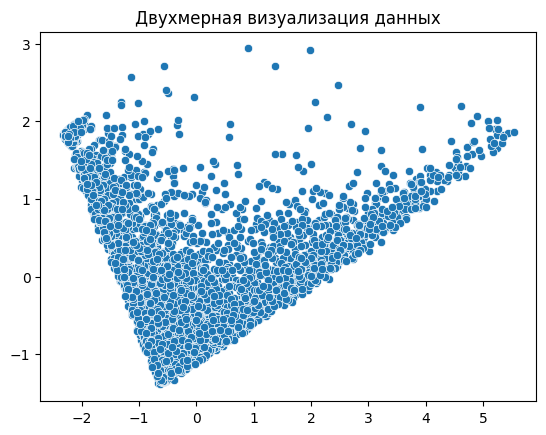

In [44]:
# визуализируем результаты понижения размерности
sns.scatterplot(data=st_principal_comp, x=st_principal_comp[:,0], y=st_principal_comp[:,1])
plt.title('Двухмерная визуализация данных');

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.

k-means++
random_state = 42
количество кластеров -  3 до 10 включительно

   silhouette  cluster
0    0.524230        3
1    0.497553        4
2    0.454544        5
3    0.448006        6
4    0.420295        7
5    0.420745        8
6    0.408957        9
7    0.397843       10


<Axes: xlabel='cluster', ylabel='silhouette'>

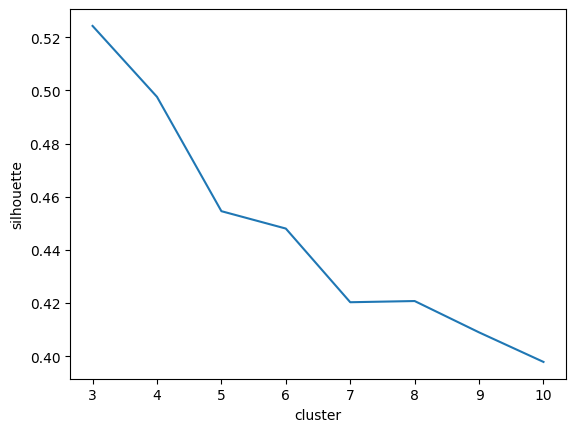

In [45]:
# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(st_principal_comp)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(st_principal_comp, k_means.predict(st_principal_comp))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = st_principal_comp

for cluster_num in range(3, 11):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
k_means_silhouette_df = pd.DataFrame(silhouette_res)
print(k_means_silhouette_df)

sns.lineplot(k_means_silhouette_df, y = k_means_silhouette_df['silhouette'], x = k_means_silhouette_df['cluster'])

In [46]:
# подготовим датафреймы для дальнейшей презентации данных презентации данных
st_principal_comp_res = pd.DataFrame(st_principal_comp.copy())
rfm_res = rfm.copy()

На основании коэффициента силуэта будем использовать 3 кластера

k-means++

In [47]:
KMeans = KMeans(n_clusters=3, random_state=42, init = 'k-means++')

st_principal_comp_res['K-Means_Cluster_ID'] = KMeans.fit_predict(st_principal_comp)
rfm_res['K-Means_Cluster_ID'] = KMeans.fit_predict(st_principal_comp)

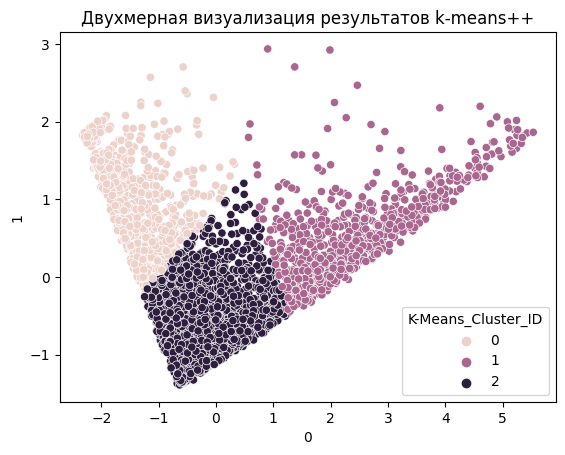

In [48]:
# визуализируем результаты понижения размерности
sns.scatterplot(data=st_principal_comp_res, x=st_principal_comp_res[0], y=st_principal_comp_res[1], hue = st_principal_comp_res['K-Means_Cluster_ID'])
plt.title('Двухмерная визуализация результатов k-means++');

GaussianMixture (EM-алгоритм)
random_state = 42
количество кластеров -  3 до 10 включительно

   silhouette  cluster
0    0.417388        3
1    0.321113        4
2    0.265157        5
3    0.177434        6
4    0.148967        7
5    0.129640        8
6    0.101492        9
7    0.079205       10


<Axes: xlabel='cluster', ylabel='silhouette'>

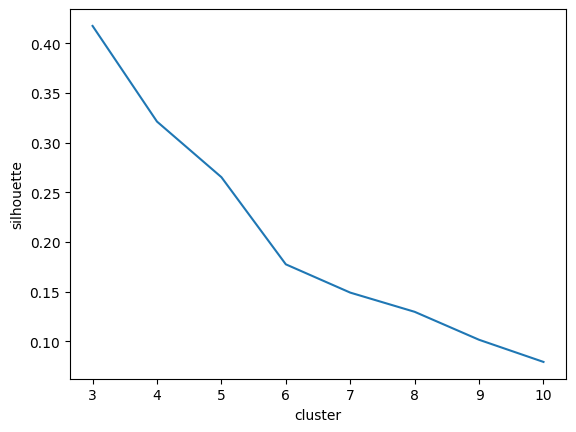

In [49]:
# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    GMM_model =  GMM(n_components=cluster_num, random_state=42, init_params= 'random_from_data')
    GMM_model.fit(st_principal_comp)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(st_principal_comp, GMM_model.predict(st_principal_comp))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные 
X = st_principal_comp

for cluster_num in range(3, 11):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
gmm_silhouette_df = pd.DataFrame(silhouette_res)
print(gmm_silhouette_df)
sns.lineplot(gmm_silhouette_df, y = gmm_silhouette_df['silhouette'], x = gmm_silhouette_df['cluster'])

На основании коэффициента силуэта будем использовать 3 кластера

In [50]:
GMM_model = GMM(n_components=3, random_state=42,init_params= 'random_from_data')
GMM_model.fit_predict(st_principal_comp)

st_principal_comp_res['GMM_Cluster_ID'] = GMM_model.fit_predict(st_principal_comp)
rfm_res['GMM_Cluster_ID'] = GMM_model.fit_predict(st_principal_comp)

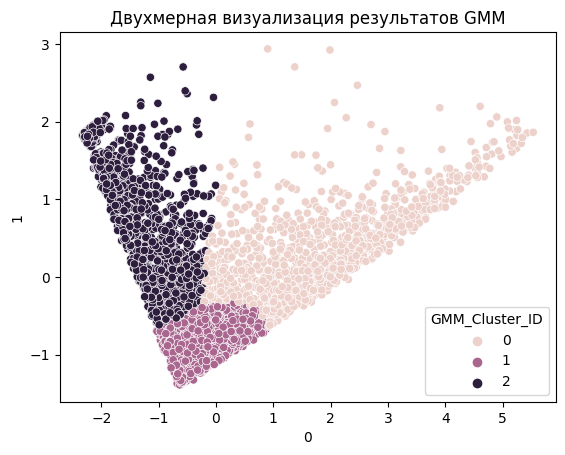

In [51]:
# визуализируем результаты понижения размерности
sns.scatterplot(data=st_principal_comp_res, x=st_principal_comp_res[0], y=st_principal_comp_res[1], hue = st_principal_comp_res['GMM_Cluster_ID'])
plt.title('Двухмерная визуализация результатов GMM');

AgglomerativeClustering

   cluster  sil_score  number_of_clusters
0        3   0.496759                   3
1        4   0.425310                   4
2        5   0.439062                   5
3        6   0.421116                   6
4        7   0.412763                   7
5        8   0.363473                   8
6        9   0.350987                   9


<Axes: xlabel='number_of_clusters', ylabel='sil_score'>

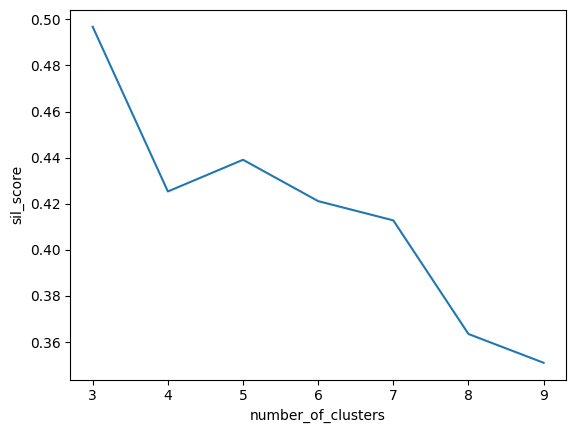

In [52]:
siliuette_list_hierarchical = []
 
for cluster in range(3,10,1):
        agglomerative = AC(affinity='euclidean',n_clusters=cluster).fit_predict(st_principal_comp)
        sil_score = silhouette_score(st_principal_comp, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score,len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','number_of_clusters'])
df_hierarchical.sort_values(by = 'sil_score')

print(df_hierarchical)

sns.lineplot(df_hierarchical, y = df_hierarchical['sil_score'], x = df_hierarchical['number_of_clusters'])

На основании коэффициента силуэта также будем использовать 3 кластера

In [53]:
agglomerative = AC(n_clusters=3, affinity='euclidean')
agglomerative.fit(st_principal_comp)

st_principal_comp_res['AC_Cluster_ID'] = agglomerative.labels_
rfm_res['AC_Cluster_ID'] = agglomerative.labels_

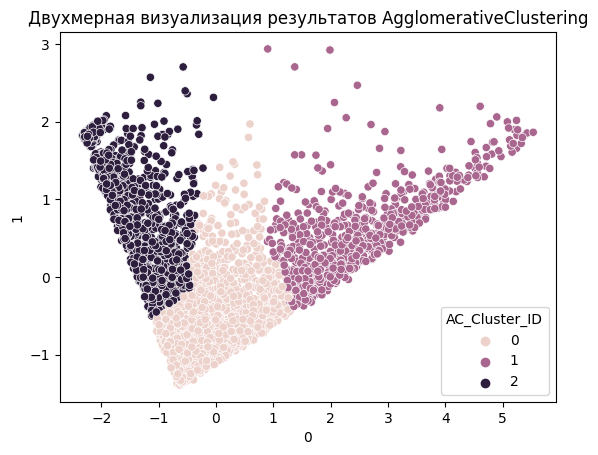

In [54]:
# визуализируем результаты понижения размерности
sns.scatterplot(data=st_principal_comp_res, x=st_principal_comp_res[0], y=st_principal_comp_res[1], hue = st_principal_comp_res['AC_Cluster_ID'])
plt.title('Двухмерная визуализация результатов AgglomerativeClustering');

DBSCAN

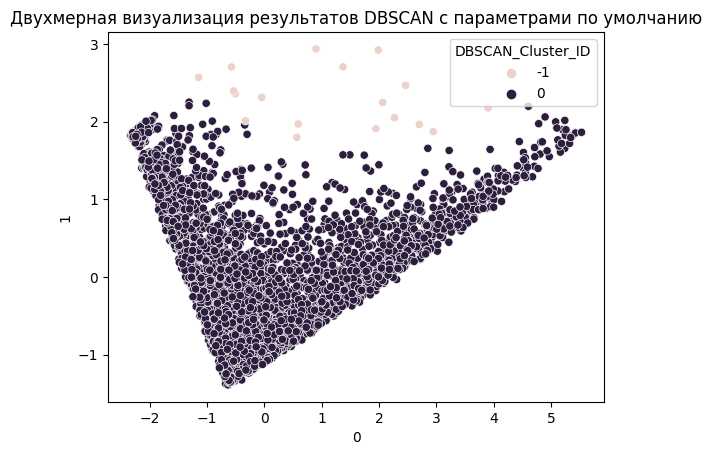

In [55]:
# cначала попробуем реализовать алгоритм по умолчанию
DBSCAN = DBSCAN(min_samples= 20)
DBSCAN.fit(st_principal_comp)

st_principal_comp_res['DBSCAN_Cluster_ID'] = DBSCAN.labels_
rfm_res['K-DBSCAN_Cluster_ID'] = DBSCAN.labels_

sns.scatterplot(data=st_principal_comp_res, x=st_principal_comp_res[0], y=st_principal_comp_res[1], hue = st_principal_comp_res['DBSCAN_Cluster_ID'])

plt.title('Двухмерная визуализация результатов DBSCAN с параметрами по умолчанию');


Модель с базовыми параметрами для нашего случая не подходит

In [56]:
from sklearn.cluster import DBSCAN
#Теперь попытаемся подобрать более оптимальные параметры для кластеризации - eps
siliuette_list_dbscan = []
 
for eps in np.arange(0.1, 0.7, 0.1):
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(st_principal_comp)
        
    sil_score = silhouette_score(st_principal_comp, dbscan.labels_, metric='euclidean')
    siliuette_list_dbscan.append((eps, sil_score, len(set(dbscan.labels_))) )


df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps',  'sil_score', 'number_of_clusters'])
df_dbscan.sort_values(by = 'sil_score')

,eps,sil_score,number_of_clusters
0,0.1,-0.312875,20
1,0.2,0.137661,4
2,0.3,0.359991,2
3,0.4,0.401790,2
5,0.6,0.425862,2
4,0.5,0.458049,2


<Axes: xlabel='eps', ylabel='sil_score'>

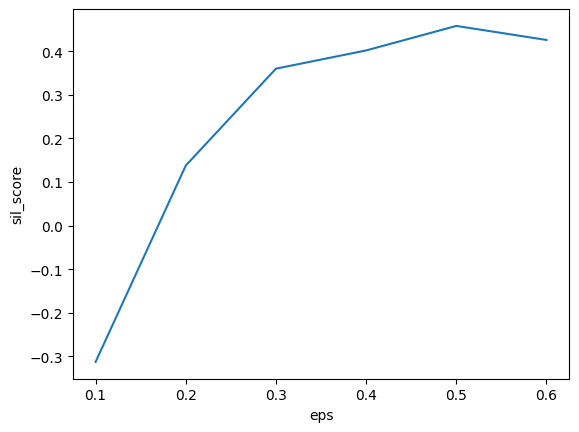

In [57]:
sns.lineplot(df_dbscan, y = df_dbscan['sil_score'], x = df_dbscan['eps'])

При подборе eps методом ситуэта оптимальным является eps = 0.5 (что соответствует значению по умолчанию  в модели dbscan, поэтому модель будет в данном случае также соответствовать результатам базовой модели.)
Также в данной ситуации наши данные размечаются в 2 кластера,а в рамках постановки задачи фиксировали, что логичнее проводить кластеризацию в от 3 до 10 включительно кластеров, тк большее или меньшее количество кластеров будет нерелеватно для маркетинга.

Поэтому изученнные вариации модели DBSCAN не подходят для решения поставленной задачи. 

Если сравнивать модели на базе Kmeans++, EM, AgglomerativeClustering, то в целом результаты сегментации крайне схожи, однако так как максимальный коэффицент ситуэта (0.52) достигнут в модели Kmeans++ то далее будем изучать собственно результаты данной модели

### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

Text(0.5, 0, 'Monetary_Value')

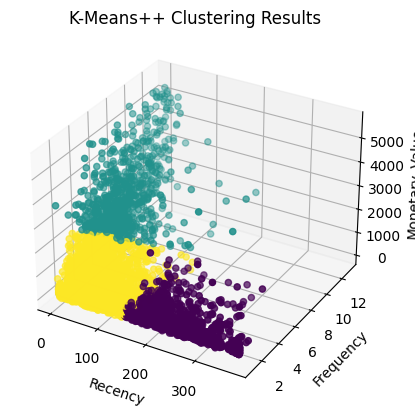

In [58]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xs = rfm_res['Recency'], ys = rfm_res['Frequency'], zs = rfm_res['Monetary_Value'], c = rfm_res['K-Means_Cluster_ID'] )

ax.set_title("K-Means++ Clustering Results")
ax.set_xlabel("Recency")
ax.set_ylabel("Frequency")
ax.set_zlabel("Monetary_Value")

#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [59]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
        legend  = grouped_data.index.name
    )
    
    # Отображаем фигуру
    fig.show()

In [60]:
kmeans_result = pd.DataFrame(rfm_res[['Recency','Frequency', 'Monetary_Value']].groupby(rfm_res['K-Means_Cluster_ID']).mean())
round(kmeans_result,2)

,Recency,Frequency,Monetary_Value
K-Means_Cluster_ID,,,
0,253.47,1.40,386.28
1,31.94,7.07,2657.75
2,51.22,2.33,660.07


Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

In [61]:
plot_cluster_profile(kmeans_result, n_clusters = 3)

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

In [361]:
round(kmeans_result,2)

,Recency,Frequency,Monetary_Value
K-Means_Cluster_ID,,,
0,253.47,1.40,386.28
1,31.94,7.07,2657.75
2,51.22,2.33,660.07


Кластер 0 - неактивные клиенты (средний срок активности 253 дня назад), которые совершили с среднем менее 1.5 заказов на небольшую сумму (386)
Кластер 1 - активные клиенты (средний срок активности 32 дня назад), совершившие в среднем 7 заказов средней суммой в 2650 фунтов
Кластер 2 - активные клиенты  (средний срок активности 21 дня назад), совершившие в среднем 2.3 заказа средней суммой в 660 фунтов

Таким образом, по результатам полученной кластериации - ключевый профиль клиентов, которые приносит доход и на котором имеет смысл сосредоточится в рамках проведения рекламных компаний - это клиенты кластера 1.

In [62]:
#!pip freeze > requirements.txt